In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


HR_mem (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, JLD
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4; const α = 1.58; const ΔU0 = 0.305;

In [9]:
t = 500; tt = 500; tstep = 0.001; tspan = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [21]:
I0 = -1.7069071372342806; U0 = 0.26504556977786675
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [11.325905642223786, 0.6594706953104683, 0.4863175026548461];

In [29]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26504556977786675, 0.305, 0.3, -1.7069071372342806]
 time:          0.0
 state:         [11.325905642223786, 0.6594706953104683, 0.4863175026548461]


In [23]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_)

index_fp = 1
index_vec = 1
ϵ = 1e-9

Jac = jacob_TM_(fp[index_fp], p, 0)
eivecs = eigvecs(Jac)
shift =  fp[index_fp] + real(eivecs[:, index_vec])*ϵ
println("fixed point with shift along stable manifold: $(shift)")

fixed point with shift along stable manifold: [8.345231472201423, 0.7384938653539003, 0.4382946559935759]


In [30]:
sol, trange = trajectory(ds, t, Ttr = tt, Δt = integ_set.dt)
println("Length sol: $(length(sol))");

Length sol: 500001


In [68]:
lb_size_ts = 30; tck_size_ts = 25
width = 2000; height = 600;

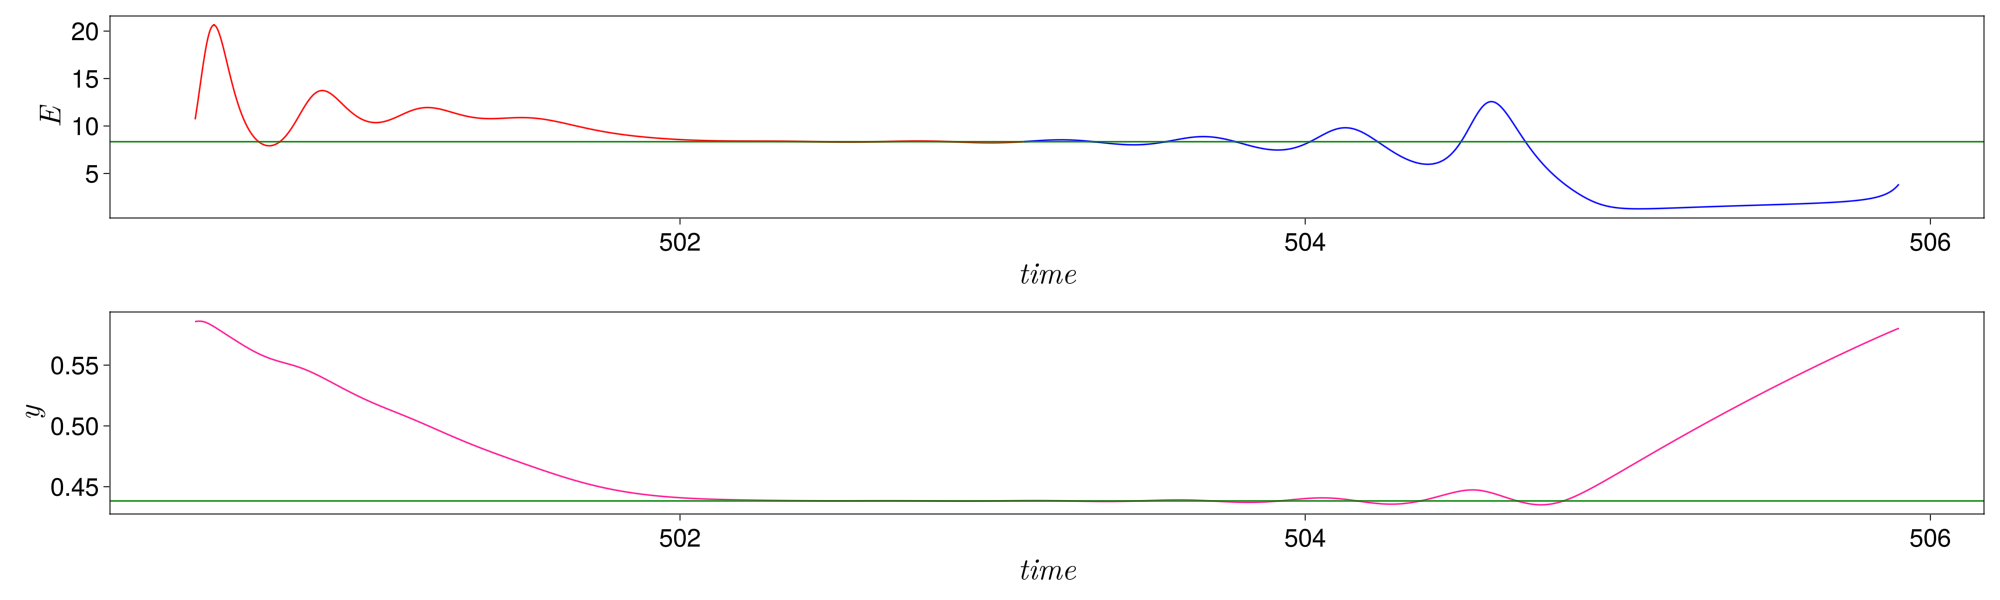

In [100]:
ts1, tf1 = 450, 3100
ts2, tf2 = 3101, 5900

f = Figure(resolution = (width, height))

axisE = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)

axisy = Axis(f[2, 1], xlabel = L"$time$", ylabel = L"$y$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)


lines!(axisE, trange[ts1:tf1], sol[ts1:tf1, 1], linewidth = 1.5, color = :red)
lines!(axisE, trange[ts2:tf2], sol[ts2:tf2, 1], linewidth = 1.5, color = :blue)
hlines!(axisE, fp[1][1], color = :green)

lines!(axisy, trange[ts:tf], sol[ts:tf, 3], linewidth = 1.5, color = :deeppink)
hlines!(axisy, fp[1][3], color = :green)

#ylims!(axisE, 8.0, 10.0)
#ylims!(axisy, 0.435, 0.445)
f

In [102]:
ts1, tf1 = 450, 3100
ts2, tf2 = 3101, 5900

idx, idy, idz = 2, 3, 1
dis  = 60;

f = Figure(resolution = (700, 700))
ax = LScene(f[1, 1], show_axis = true)

scale!(ax.scene, 50, 50, 1)

"""ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts, zlabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts, zticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)"""


lines!(sol[ts1:tf1, idx], sol[ts1:tf1, idy], sol[ts1:tf1, idz],
    linewidth = 1.5, color = :red)

lines!(sol[ts2:tf2, idx], sol[ts2:tf2, idy], sol[ts2:tf2, idz],
    linewidth = 1.5, color = :blue)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)